In [ ]:
!pip install datasets -U
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
pip install transformers[torch] -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
pip show accelerate


Name: accelerate
Version: 0.24.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, torch
Required-by: 


In [ ]:
!pip install transformers -U

In [ ]:
#load datasetAC
from datasets import load_dataset
sentiment_dataset = load_dataset("mteb/tweet_sentiment_extraction")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
sentiment_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 27481
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 3534
    })
})

In [ ]:
sentiment_dataset["train"] = sentiment_dataset["train"].remove_columns("id")

sentiment_dataset["test"] = sentiment_dataset["test"].remove_columns("id")

In [ ]:
sentiment_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 27481
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3534
    })
})

In [ ]:
sentiment_dataset.set_format(type="pandas")
df = sentiment_dataset["train"][:]
df.head()

,text,label,label_text
0,"I`d have responded, if I were going",1,neutral
1,Sooo SAD I will miss you here in San Diego!!!,0,negative
2,my boss is bullying me...,0,negative
3,what interview! leave me alone,0,negative
4,"Sons of ****, why couldn`t they put them on t...",0,negative


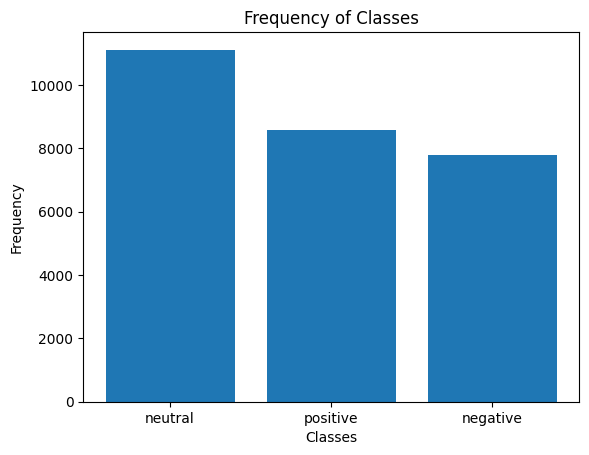

In [ ]:
#data visualization
import matplotlib.pyplot as plt

classes = df["label_text"].value_counts().index
frequencies = df["label_text"].value_counts().values

plt.figure()
plt.bar(classes, frequencies)

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Classes')
plt.show()


In [ ]:
df["label"].value_counts()

1    11118
2     8582
0     7781
Name: label, dtype: int64

In [ ]:
sentiment_dataset.reset_format()

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
#encode and calculate sentiment score for a text

In [ ]:
model__1 =model
tokens_1 = tokenizer.encode('The concert last night was incredible. The band put on an electrifying performance.', return_tensors='pt')

In [ ]:
result= model__1(tokens_1)

In [ ]:
result.logits

tensor([[-2.4327, -2.1483, -0.6919,  1.5441,  2.8949]],
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1

5

In [ ]:
num_labels = result.logits.size(1)
print(num_labels)

5


In [ ]:
sentiment_dataset["train"]

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 27481
})

In [ ]:
#preprocess data
sentiment_dataset = sentiment_dataset.map(lambda samples: tokenizer(samples["text"], padding=True, truncation=True), batched=True)
train_sentiment_dataset = sentiment_dataset["train"].select(range(500))
test_sentiment_dataset = sentiment_dataset["test"].select(range(200))

Map:   0%|          | 0/27481 [00:00<?, ? examples/s]

Map:   0%|          | 0/3534 [00:00<?, ? examples/s]

In [ ]:
train_sentiment_dataset

Dataset({
    features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 500
})

In [ ]:
print(train_sentiment_dataset[:1])

{'text': [' I`d have responded, if I were going'], 'label': [1], 'label_text': ['neutral'], 'input_ids': [[101, 151, 100, 146, 10574, 56382, 117, 11526, 151, 10342, 17010, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
print(train_sentiment_dataset['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
test_sentiment_dataset

Dataset({
    features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 200
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [ ]:
import os

working_dir = "./"

output_directory =  os.path.join(working_dir, "outputs_data")

if not os.path.exists(working_dir):
    os.mkdir(working_dir)
if not os.path.exists(output_directory):
    os.mkdir(output_directory)


In [ ]:
from transformers import TrainingArguments
def create_training_arguments(path, learning_rate):
    training_args = TrainingArguments(
        output_dir=path, # Where the model predictions and checkpoints will be written
        learning_rate= learning_rate, # size of optimization step
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3, #no of times model run through training data
        weight_decay=0.01,
        save_strategy="epoch",
    )
    return training_args

In [ ]:
from transformers import Trainer
def create_trainer(model, training_args, train_dataset):
    trainer = Trainer(
        model=model,
        args=training_args, #The args for the training.
        train_dataset=train_dataset,
        eval_dataset = test_sentiment_dataset,
        data_collator = data_collator,
        compute_metrics = compute_metrics,
    )
    return trainer

In [ ]:
training_args = create_training_arguments(output_directory, 2e-5)

In [ ]:
trainer = create_trainer(model, training_args, train_sentiment_dataset)

In [ ]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


TrainOutput(global_step=189, training_loss=0.562789553687686, metrics={'train_runtime': 1430.013, 'train_samples_per_second': 1.049, 'train_steps_per_second': 0.132, 'total_flos': 43167820248000.0, 'train_loss': 0.562789553687686, 'epoch': 3.0})

In [ ]:
c

{'eval_loss': 0.6803540587425232,
 'eval_accuracy': 0.755,
 'eval_f1': 0.7576564933042667,
 'eval_runtime': 44.6622,
 'eval_samples_per_second': 4.478,
 'eval_steps_per_second': 0.56,
 'epoch': 3.0}

In [ ]:
trainer.save_model()

In [ ]:
trainer.model.save_pretrained(output_directory)

In [ ]:
reviews = [
    "I had a fantastic day at the beach today. The weather was perfect, and I enjoyed every moment.",
    "The customer service at the restaurant was terrible. The staff was rude and unresponsive.",
    "My new phone is amazing. It's fast, has a great camera, and I love all its features.",
    "The movie I watched last night was a complete disappointment. It was boring and poorly made.",
    "I received the best news today. I got accepted into my dream college!",
    "The quality of the product I purchased online was awful. It broke within a day.",
    "The concert last night was incredible. The band put on an electrifying performance.",
    "I had a terrible experience with the airline. My flight was delayed, and my luggage got lost.",
    "The surprise party my friends organized for my birthday was heartwarming. I felt so loved and appreciated."
]


In [ ]:
text = "I had a fantastic day at the beach today. The weather was perfect, and I enjoyed every moment."

In [ ]:
inputs = tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,   151, 10407,   143, 47088, 11111, 10160, 10103, 14575, 13980,
           119, 10103, 24387, 10140, 23021,   117, 10110,   151, 50644, 13667,
         14068,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
import torch
model_3 = AutoModelForSequenceClassification.from_pretrained(
    output_directory)
with torch.no_grad():
    logits = model_3(**inputs).logits

In [ ]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'3 stars'

In [ ]:
text = "Amidst the golden hues of a serene sunset, Laughter dances in the gentle breeze's embrace. In the company of friends, our hearts entwined, We celebrate life's beauty, finding solace and grace. With each shared smile and story told, Our spirits soar, for happiness knows no bound."

In [ ]:
inputs = tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101, 16255, 13067, 10123, 10103, 14209, 41260, 10107, 10108,   143,
         10542, 11968, 43612,   117, 18418, 46423, 72203, 10104, 10103, 27855,
         10301, 18710, 12168, 10732,   112,   161, 10252, 16508, 10421,   119,
         10104, 10103, 11062, 10108, 16119,   117, 14008, 29642, 28960, 64473,
         10163,   117, 11312, 59571, 10287,   112,   161, 25209,   117, 33570,
         18080, 10421, 10110, 14586,   119, 10171, 11885, 27625, 45074, 10110,
         12159, 20917,   117, 14008, 59430, 46522, 10131,   117, 10139, 55899,
         45864, 10181, 34637,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [ ]:
model_3 = AutoModelForSequenceClassification.from_pretrained(output_directory)
with torch.no_grad():
    logits = model_3(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'3 stars'

In [ ]:
trainer.save_model("CustomModel")

In [ ]:
model_2 = AutoModelForSequenceClassification.from_pretrained("CustomModel")

In [ ]:
text2 = "The conference will take place next week, and many experts from various fields will attend."

In [ ]:
def sentiment_score(text):
  tokens_2 = tokenizer.encode(text, return_tensors='pt')
  result = model_2(tokens_2)
  return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(text)

3

In [ ]:
sentiment_dataset.set_format(type="pandas")
df = sentiment_dataset["test"][:]
df.head()

,text,label,label_text,input_ids,token_type_ids,attention_mask
0,Last session of the day http://twitpic.com/67ezh,1,neutral,"[101, 11706, 23734, 10108, 10103, 11111, 10635...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Shanghai is also really exciting (precisely -...,2,positive,"[101, 23563, 10127, 10398, 25165, 11460, 60280...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"Recession hit Veronique Branquinho, she has to...",0,negative,"[101, 58593, 36546, 14105, 32322, 53366, 47237...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,happy bday!,2,positive,"[101, 19308, 18832, 14519, 106, 102, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,http://twitpic.com/4w75p - I like it!!,2,positive,"[101, 10635, 131, 120, 120, 162, 65559, 29877,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
import pandas as pd
dp = pd.DataFrame()
dp['sentiment'] = df['text'].apply(lambda x: sentiment_score(x[:10]))


In [ ]:
max = df['text'].apply(lambda x: sentiment_score(x[:10])).max()

In [ ]:
max

3

In [ ]:
min = df['text'].apply(lambda x: sentiment_score(x[:10])).min()

In [ ]:
min

1

In [ ]:
dp['text'] = df['text']

In [ ]:
dp.head(6)

,sentiment,text
0,2,Last session of the day http://twitpic.com/67ezh
1,2,Shanghai is also really exciting (precisely -...
2,2,"Recession hit Veronique Branquinho, she has to..."
3,3,happy bday!
4,2,http://twitpic.com/4w75p - I like it!!
5,2,that`s great!! weee!! visitors!
